<a href="https://colab.research.google.com/github/ShahidIIM/Evaluation_Project/blob/main/Health_Insurance_Cross_Sell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Health Insurance Cross Sell Prediction**

## Project Summary

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company. An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee. For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

## **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers, now they need our help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

In order to predict whether the customer would be interested in Vehicle insurance, we have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

In [77]:
import numpy as np
import pandas as pd
%matplotlib inline  

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for hypothesis testing
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f

# Importing libraries for data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

# Importing Machine Learning algorithm libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Importing Classification algorithm metrics
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({'font.size': 14})

In [22]:
df = pd.read_csv("/content/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [23]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [24]:
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


# Exploratory Data Analysis(EDA)

Dataset Rows & Columns count

In [25]:
x = df.shape
print(f'the dataset has {x[0]} rows and {x[1]} columns')

the dataset has 381109 rows and 12 columns


Dataset Information

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


Duplicate Values

In [27]:
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


Missing Values/Null Values

In [28]:
missing_values = df.isna().sum()
print(missing_values)

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


In [29]:
# Dataset Columns
col = df.columns
print(col)

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')


In [30]:
# Dataset Describe
df.describe(include = 'all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


In [31]:
# Check Unique Values for each variable and listing values whose count is less than 25
for column in df.columns:
  res = len(df[column].unique())
  print(f"The number of unique variables in {column} column are: {res}")
  if res<=3:
    x = df[column].unique()
    print(f'printing unique values of {column}')
    print('the values are: ', x )
    print('--'*30)

The number of unique variables in id column are: 381109
The number of unique variables in Gender column are: 2
printing unique values of Gender
the values are:  ['Male' 'Female']
------------------------------------------------------------
The number of unique variables in Age column are: 66
The number of unique variables in Driving_License column are: 2
printing unique values of Driving_License
the values are:  [1 0]
------------------------------------------------------------
The number of unique variables in Region_Code column are: 53
The number of unique variables in Previously_Insured column are: 2
printing unique values of Previously_Insured
the values are:  [0 1]
------------------------------------------------------------
The number of unique variables in Vehicle_Age column are: 3
printing unique values of Vehicle_Age
the values are:  ['> 2 Years' '1-2 Year' '< 1 Year']
------------------------------------------------------------
The number of unique variables in Vehicle_Damage

In [32]:
# having a copy of the dataframe
copy_df = df.copy()


# dropping the id column
df.drop(['id'],axis=1, inplace=True)

# Converting 'Driving_License' & 'Previously_Insured' from 1,0 to Yes and No.

df['Driving_License'] = df['Driving_License'].apply(lambda x: 'Yes' if x==1 else "No")
df['Previously_Insured']=df['Previously_Insured'].apply(lambda x: 'Yes' if x==1 else "No")

* Dropped the id column as it was irrelevant

* Converted the values in categorical columns 'Driving_License' & 'Previously_Insured' from 1 & 0 to Yes and No for better visualization.

* Coverted 'Region_Code' , 'Annual_Premium' & 'Policy_Sales_Channel' columns from float to int datatype to make it space optimized.

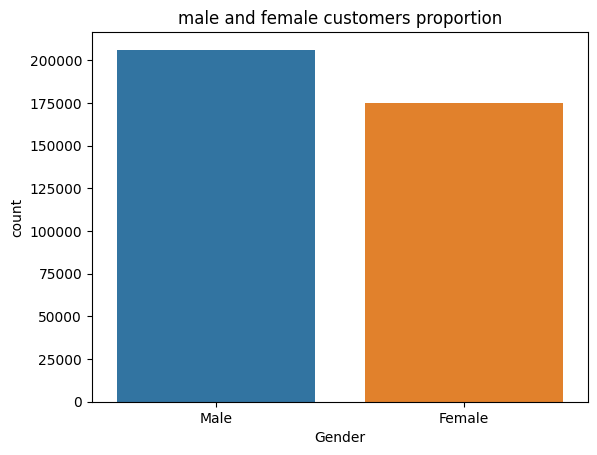

Male      206089
Female    175020
Name: Gender, dtype: int64


In [33]:
# plotting count plot
sns.countplot(x=df['Gender'], data=df)

# setting chart title
plt.title('male and female customers proportion')

# display chart
plt.show()

# printing the counts for reference
print(df.Gender.value_counts())

there are 206089 Male customers and 175020 Female customers

this helps us to understand the gender ratio.

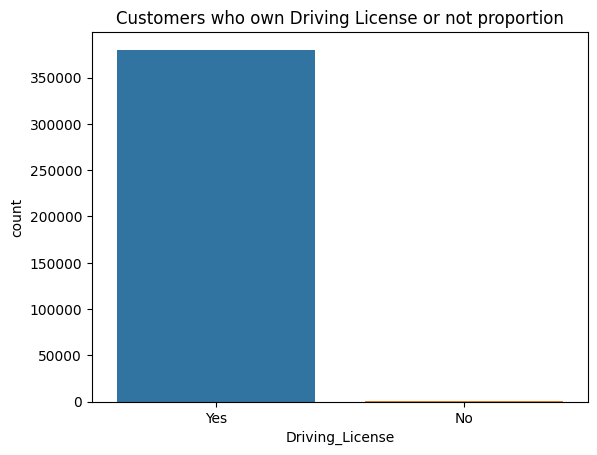

Yes    380297
No        812
Name: Driving_License, dtype: int64


In [34]:
# Chart - 2 visualization code
sns.countplot(x='Driving_License', data=df)

# setting chart title
plt.title('Customers who own Driving License or not proportion')

# display chart
plt.show()

# printing the counts for reference
print(df.Driving_License.value_counts())

there are 380297 people who own Driving License and 812 don't

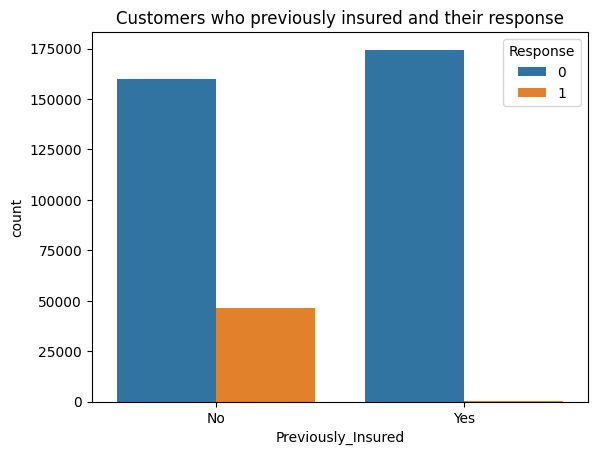

No     206481
Yes    174628
Name: Previously_Insured, dtype: int64


In [36]:
# Chart - 3 visualization code
sns.countplot(x='Previously_Insured', data=df, hue = 'Response')

# setting chart title
plt.title('Customers who previously insured and their response')

# display chart
plt.show()

# printing the counts for reference
print(df.Previously_Insured.value_counts())

It is observed that people who have previously not insured are intrested in the policy

It is found that people who have not insured previously are more intrested in buying the ploicy, so it is better to tap the market who previously have not insured

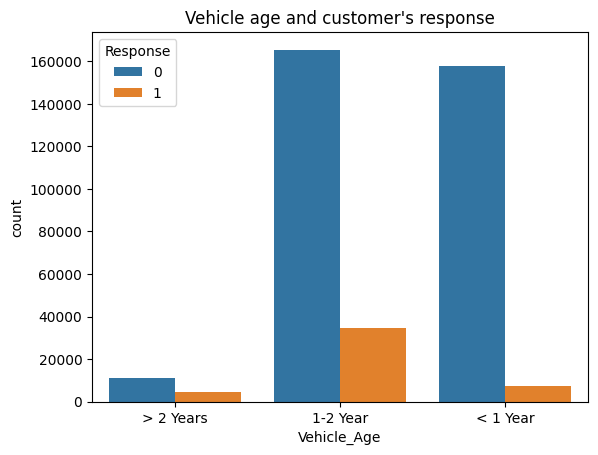

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64


In [37]:
# Chart - 4 visualization code

sns.countplot(x='Vehicle_Age', data=df, hue = 'Response')

# setting chart title
plt.title('Vehicle age and customer\'s response')

# display chart
plt.show()

# printing the counts for reference
print(df.Vehicle_Age.value_counts())

* It is observed that most of the people with vehicle age is 1-2 years.
* Ratio wise people with vehicle age greater than 2 years are more intrested in buying policy
* Most of the customers have their vehicle age as 1-2 years


As per the ratio it is better to tap the customers whose vehicle age is more than 2 years and we have a good scope in people who own vehicle of age 1-2 years as well.

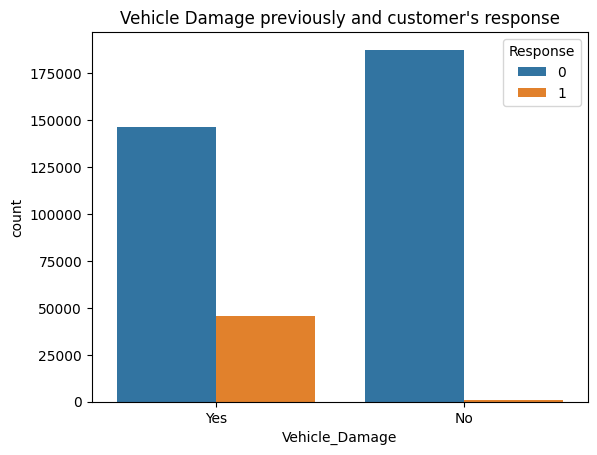

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64


In [38]:
# Chart - 5 visualization code
sns.countplot(x='Vehicle_Damage', data=df, hue = 'Response')

# setting chart title
plt.title('Vehicle Damage previously and customer\'s response')

# display chart
plt.show()

# printing the counts for reference
print(df.Vehicle_Damage.value_counts())

* Its found that previously customers who got their vehicle damaged are more intrested in buying new policy.

Customers who are previously not damaged their car are not much intrested in buying the policy.

People who have damaged their car previously are more intrested in buying the policy.

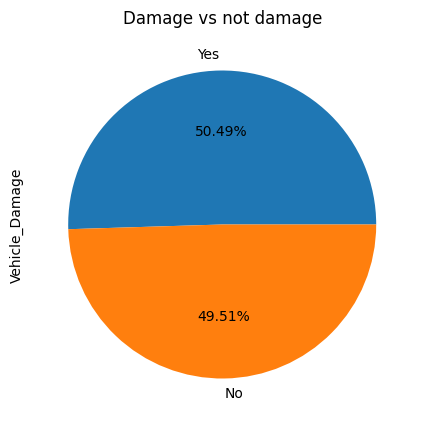

In [39]:
# Chart - 6 visualization code
spread = df['Vehicle_Damage'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

# pictdistance 0.6 is set to display the value inside the chart, if set more than 1, it'll display outside the chart.
spread.plot(kind = 'pie', autopct='%1.2f%%', pctdistance=0.6)

#setting colum chart title
plt.title(f'Damage vs not damage')
plt.show()

* It is found that people who have damaged their vehicle and not damaged share almost equal proportion.

comparing the insights previously it is found that the people who damaged their vehicle are more intrested to buy ploicy, so since 50% of the people who are willing to buy the plociy, the market is big to capture

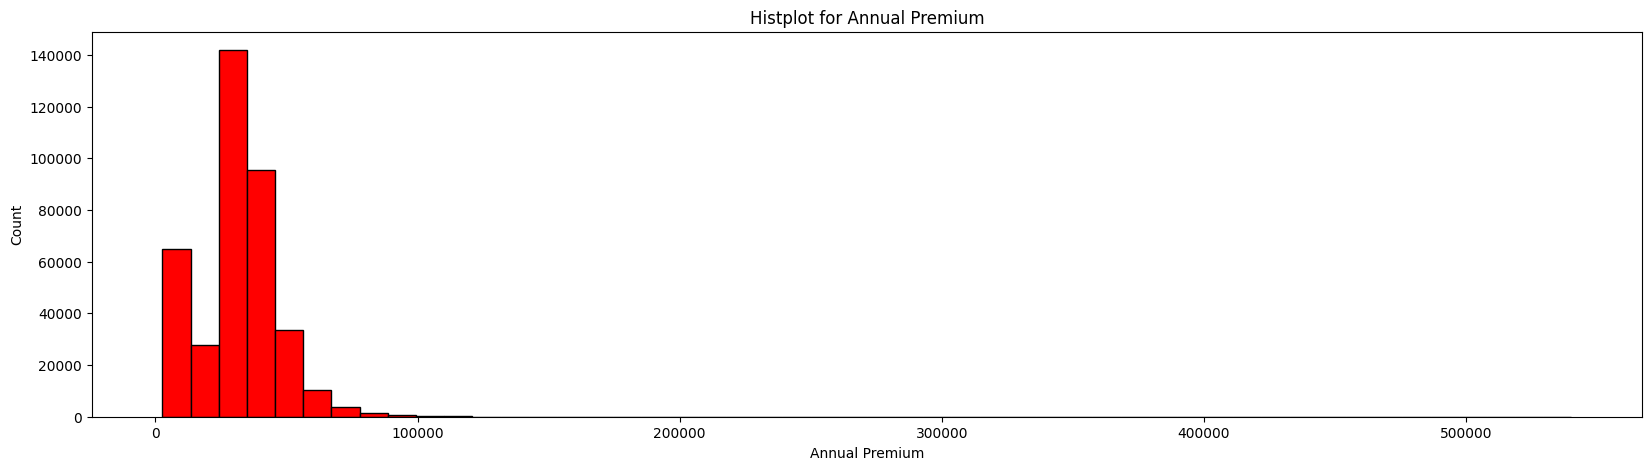

In [41]:
# Chart - 7 visualization code
plt.rcParams['figure.figsize'] = (20, 5)
plt.hist(df['Annual_Premium'], bins = 50, color='red', edgecolor='black')

plt.xlabel('Annual Premium')
plt.ylabel('Count')
plt.title('Histplot for Annual Premium')
plt.show()

* Most of the premium falls under range 5000-100000

there are some premiums that are above 100000

<Axes: >

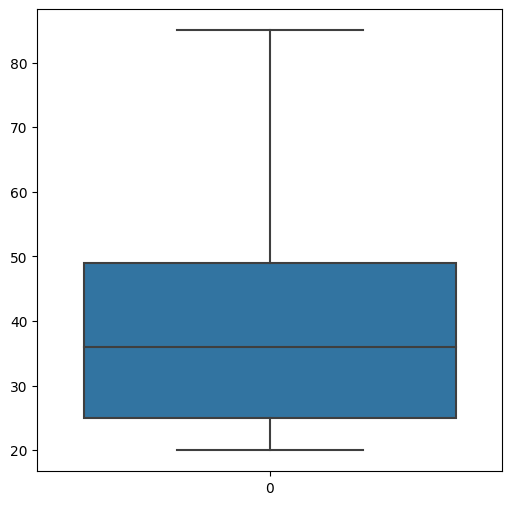

In [42]:
# Chart - 8 visualization code
plt.figure(figsize=(6,6))
sns.boxplot(df['Age'])

* There are no outliers in the age columns and most of the customers belong to age group 25-48



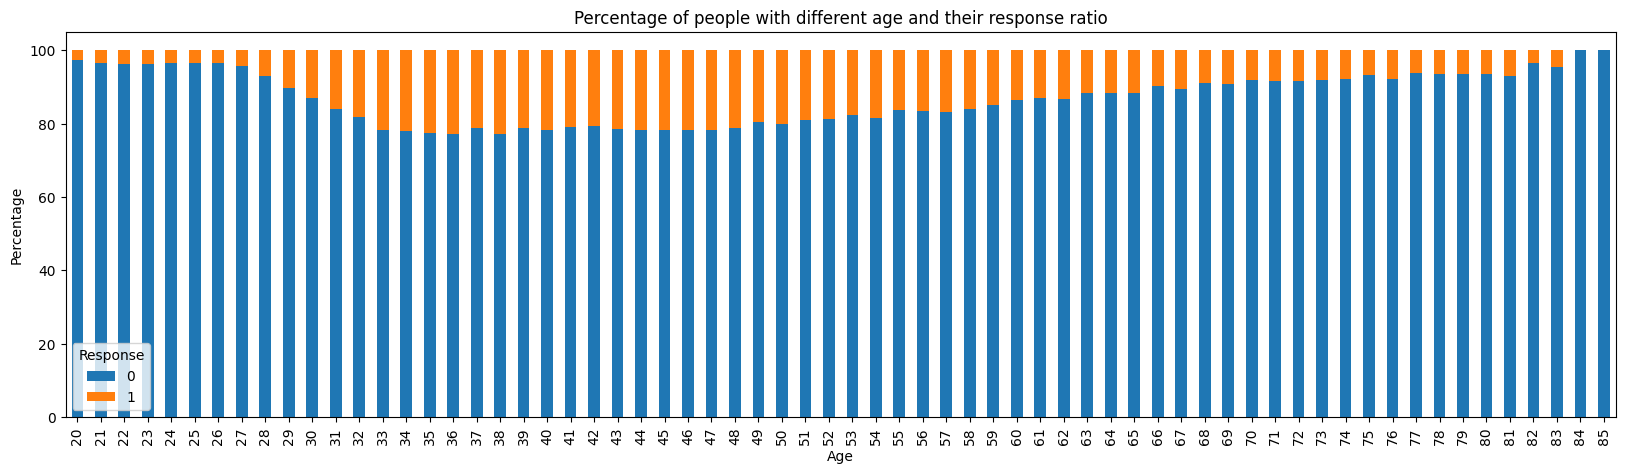

In [43]:
age_response = df.groupby(['Age', 'Response']).size().unstack()

#plotting
total_counts = age_response.sum(axis=1)
age_response_ratios = age_response.div(total_counts, axis=0) * 100

# create a stacked bar chart
age_response_ratios.plot(kind='bar', stacked=True)
plt.title('Percentage of people with different age and their response ratio')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.legend(title='Response')
plt.show()


* Customes of age between 32-58 ar more mature and are intrested in buying the policy.

Tapping the customer of age between 32-58 would be more benificial.

Text(0, 0.5, 'Number of Customers')

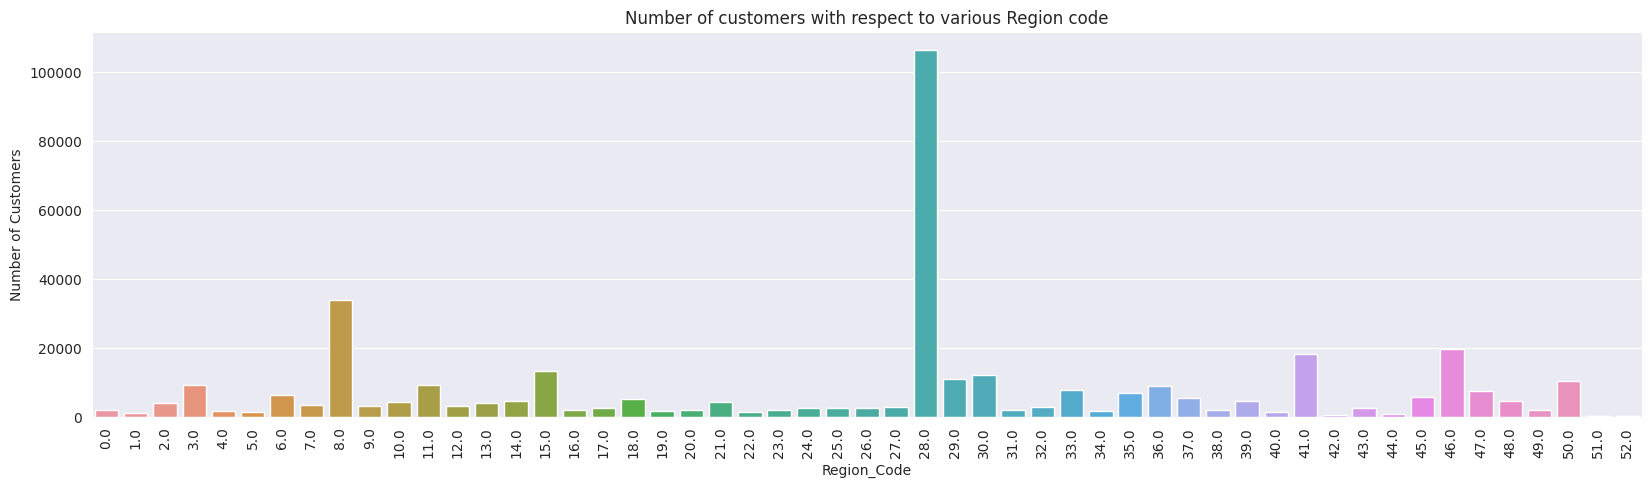

In [44]:
# Chart - 10 visualization code
sns.set_style('darkgrid')
plt.figure(figsize=(20, 5))

sns.countplot(x='Region_Code', data=df)

plt.title('Number of customers with respect to various Region code')
plt.xticks(rotation=90)
plt.ylabel('Number of Customers')

* Most of the customers belong to region code 28 followed by 8

It helps us to understand that most of our customers belong to region code 28, so it would be better if we run our marketing campagn such that in 28 to aquire more customers and in other regions to penetrate the market.

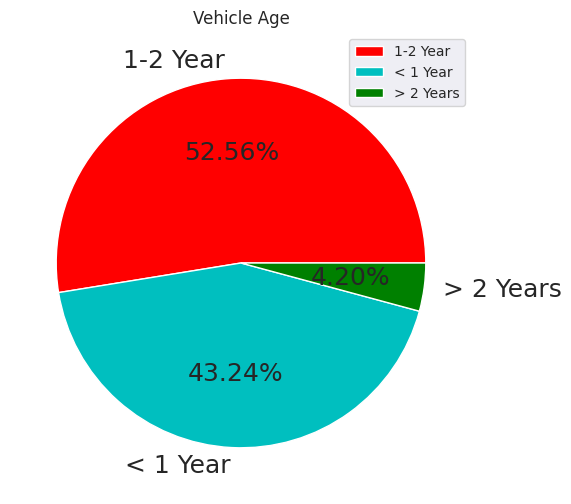

In [45]:
# Chart - 11 visualization code
data = df['Vehicle_Age'].value_counts()
labels = [ '1-2 Year', '< 1 Year','> 2 Years'] 

#create pie chart
plt.figure(figsize=(6,6))
# explode=(0,0.1,0.1,0.1,0.0,1.3) explode=explode,
color = ['r', 'c', 'g', 'm', 'k']
plt.pie(data,  colors = color, autopct='%.2f%%',labels = labels, textprops={'fontsize': 18})
plt.title('Vehicle Age')
plt.legend()
plt.show()
# print(data)

* Its found that most of the customer have vehicle age of around 1-2 year and there are less customers whose vehicle age is greater than 2 years.

The insites are useful for understanding which age group customer's vehicles belongs to.

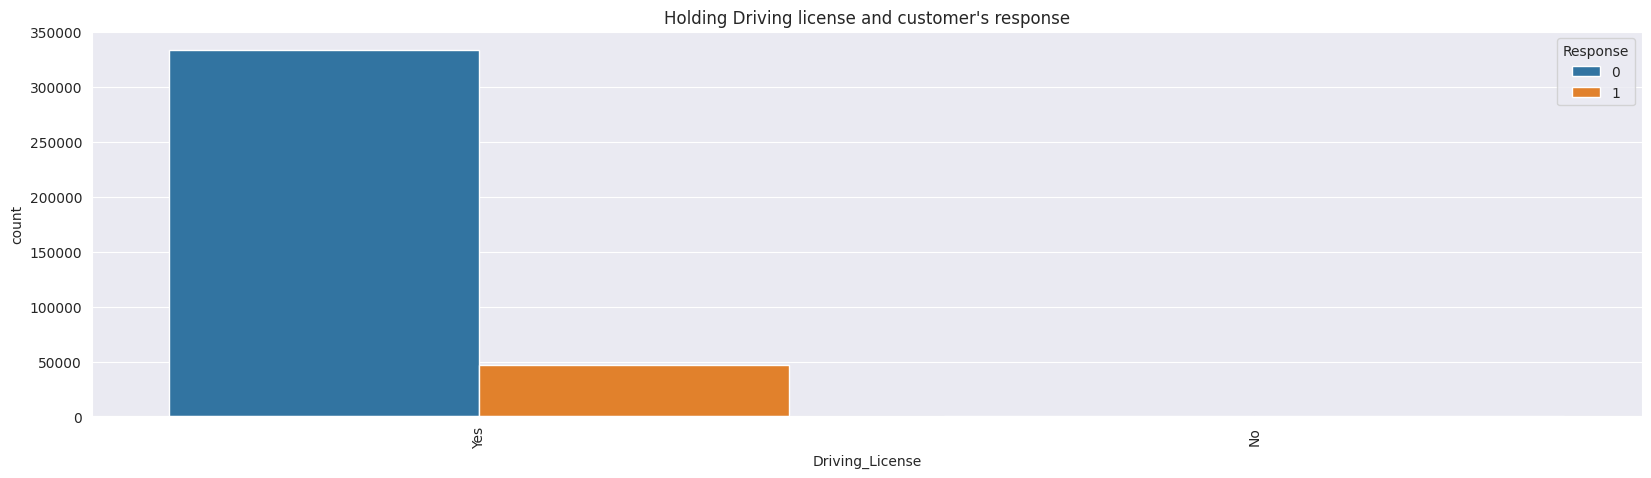

In [46]:
# Chart - 12 visualization code
sns.countplot(x='Driving_License',hue='Response', data=df)

# setting chart title
plt.title('Holding Driving license and customer\'s response')
plt.xticks(rotation=90)

# display chart
plt.show()


* Its found that most of the customers who do not own driving license are less and are least intreasted, so tapping the customers with license would be benificial.



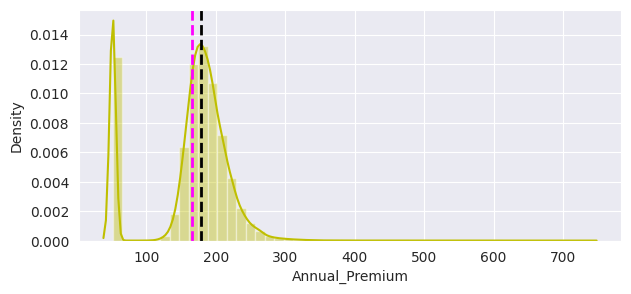

In [47]:
# Chart - 13 visualization code
plt.figure(figsize=(7,3))
plt.xlabel('Annual Premium')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['Annual_Premium']), color="y")
ax.axvline(np.sqrt(df['Annual_Premium']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['Annual_Premium']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

* we found the mean and median distribution of the Anuall Premium.

mean and median are nearly equal on the Annual Premium

Text(0.5, 58.5815972222222, 'Feature/Property')

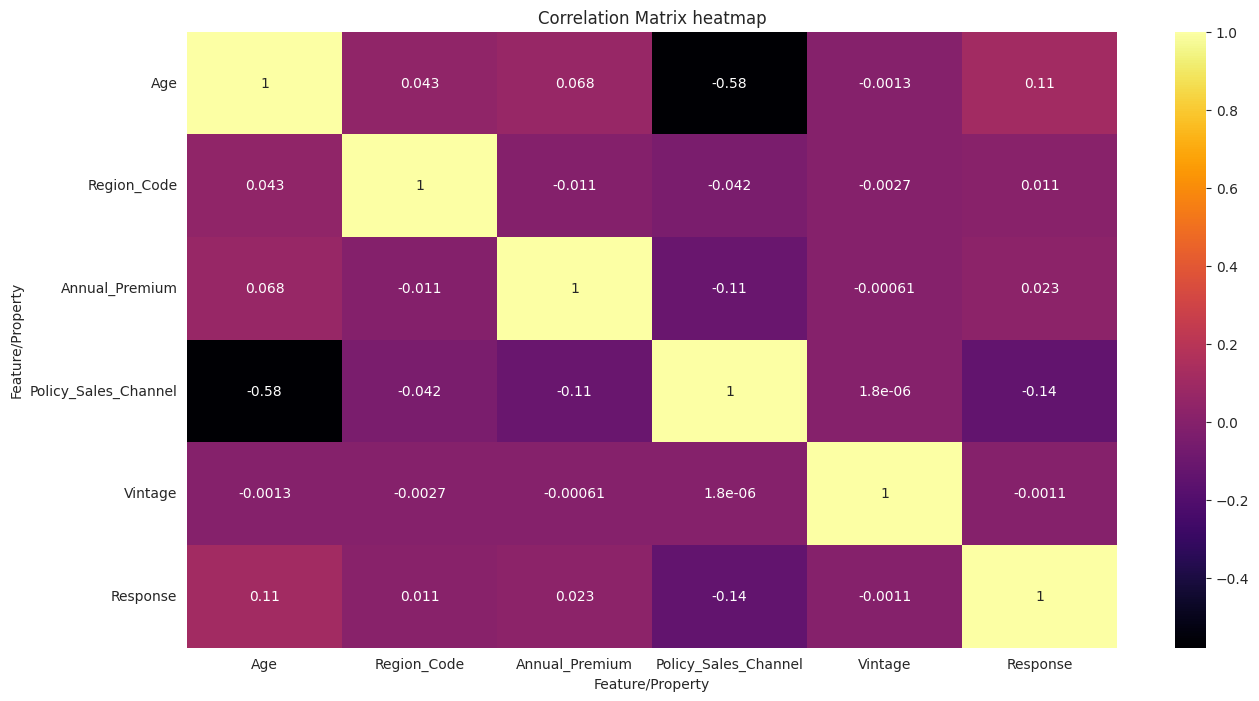

In [50]:
# Correlation Heatmap visualization code
corr_matrix = df.corr()
plt.figure(figsize=(15,8))
# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='inferno')

#setting labels to infer the plot
plt.title('Correlation Matrix heatmap')
plt.ylabel('Feature/Property')
plt.xlabel('Feature/Property')

* It is found that policy sales channel and respons is negativly correlated.

* most of the properties/features against eachother are very least correlated.

Text(0.5, 0, 'Feature/Property')

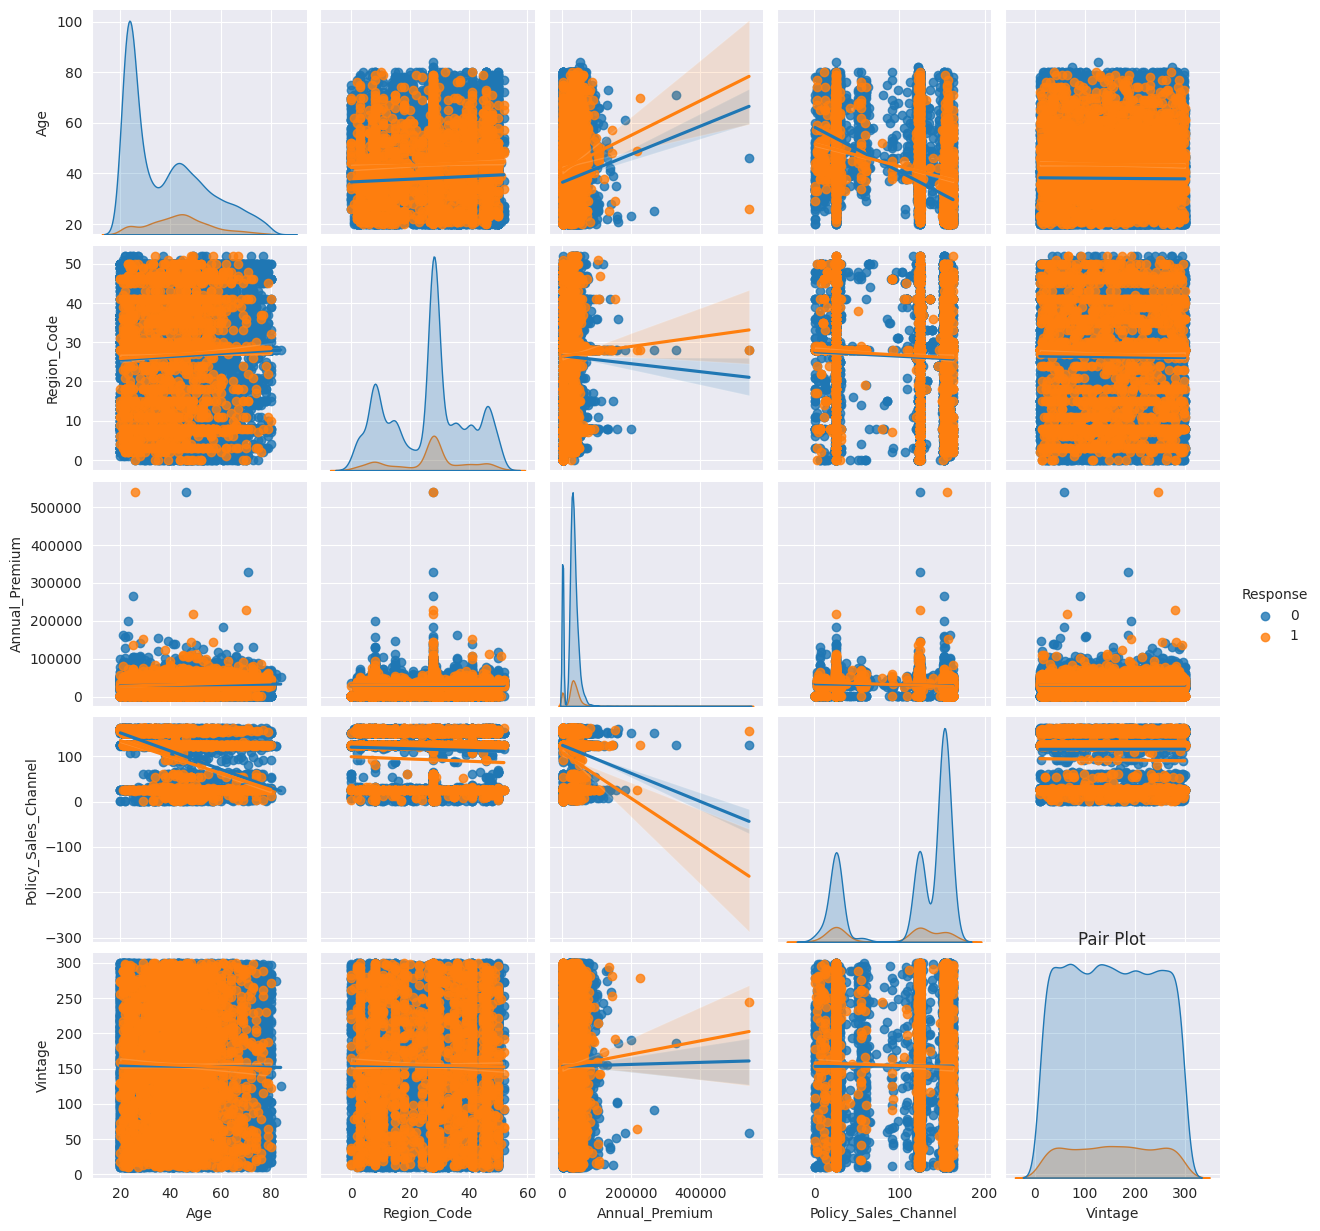

In [51]:
# Pair Plot visualization code

# since the data is extreemly high, plotting a pair plot would be time consuming, so we are taking a random sample of 25000 and creating subset
# this can be still reduced by reducing the sample size
df_sample = df.sample(n=25000, random_state=48)

# plotting pair plot for the sample database
# setting corner=True can still to reduce computation time, corner=True
sns.pairplot(df_sample, diag_kind="kde", kind = 'reg', hue = 'Response')


#setting labels to infer the plot
plt.title('Pair Plot')
plt.ylabel('Feature/Property')
plt.xlabel('Feature/Property')

* positive response of Vintage customers are positivly correlated with annual customers

* policy sales channel is negativly corellated to age.

## Hypothesis Testing


* The average annual premium for a vehicle insurance is greater than 15,000.

* The average age of the customer is greater than 32.

* The Standard deviation of annual premium is 10,000.

In [52]:
# Perform Statistical Test to obtain P-Value

annual_premium_sample = df['Annual_Premium'].sample(500)
annual_premium_mean = np.mean(annual_premium_sample)
annual_premium_std = np.std(annual_premium_sample)

In [53]:
# Computing test statistic

ts = (annual_premium_mean-15000)/(annual_premium_std/(np.sqrt(500)))
print(ts)

21.755234376820606


In [54]:
# Calculating the probability

prob_z = norm.cdf(19.73, 0, 1)
print(prob_z)

# P-Value
p1 = 1-prob_z
print(p1)

1.0
0.0


In [55]:
# Perform Statistical Test to obtain P-Value

age_sample = df['Age'].sample(500)
age_mean = np.mean(age_sample)
age_std = np.std(age_sample)

In [56]:
# Computing test statistic

ts = (age_mean-32)/(age_std/(np.sqrt(500)))
print(ts)

11.577549365490263


In [57]:
# Calculating the probability

prob_z = norm.cdf(8.96, 0, 1)
print(prob_z)

# P-Value
p1 = 1-prob_z
print(p1)

1.0
0.0


In [58]:
# Perform Statistical Test to obtain P-Value

ap_sample = df['Annual_Premium'].sample(50)
S2 = (np.std(ap_sample))**2

In [61]:
# Computing test statistic

ts3 = (49 * S2)/(10000*10000)
print(ts3)

117.6177247896


## Feature Engineering & Data Pre-processing

In [ ]:
# Handling Outliers & Outlier treatments

#after investigating we found most of the outliers in Annual Premium


# Plotting the boxplot for 'Annual_Premium'
sns.boxplot(x=df['Annual_Premium'])
plt.xlabel('values')
plt.ylabel('Annual Premium')
plt.show()

In [62]:
# Finding interquantile range

percentile25 = df['Annual_Premium'].quantile(0.25)
percentile75 = df['Annual_Premium'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print(f'upper limit = {upper_limit} \nlower limit = {lower_limit}')

upper limit = 61892.5 
lower limit = 1912.5


In [63]:
# Capping the data above the upper limit to upper limit & below the lower limit to the lower limit

df['Annual_Premium'] = np.where(
    df['Annual_Premium'] > upper_limit,
    upper_limit,
    np.where(
        df['Annual_Premium'] < lower_limit,
        lower_limit,
        df['Annual_Premium']
    )
)

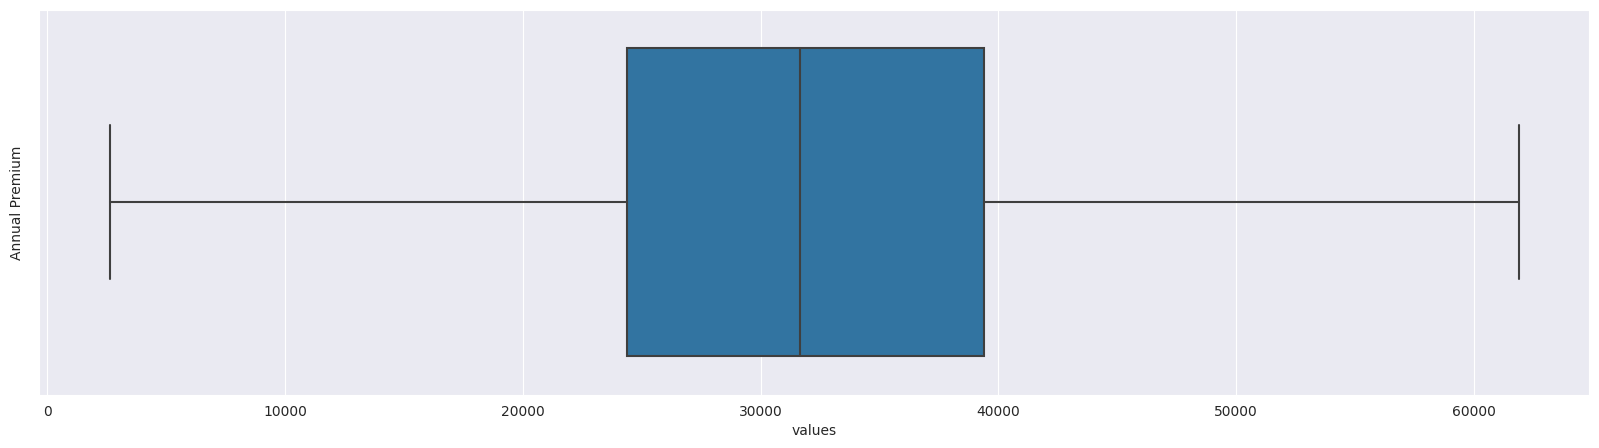

In [64]:
# Plotting the boxplot again to check if the capping is correct
sns.boxplot(x=df['Annual_Premium'])
plt.xlabel('values')
plt.ylabel('Annual Premium')
plt.show()

In [65]:
# Encode your categorical columns
df=pd.get_dummies(df,drop_first=True,sparse=True)

In [66]:
df.head()

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Driving_License_Yes,Previously_Insured_Yes,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,28.0,40454.0,26.0,217,1,1,1,0,0,1,1
1,76,3.0,33536.0,26.0,183,0,1,1,0,0,0,0
2,47,28.0,38294.0,26.0,27,1,1,1,0,0,1,1
3,21,11.0,28619.0,152.0,203,0,1,1,1,1,0,0
4,29,41.0,27496.0,152.0,39,0,0,1,1,1,0,0


Text(0.5, 58.5815972222222, 'Feature/Property')

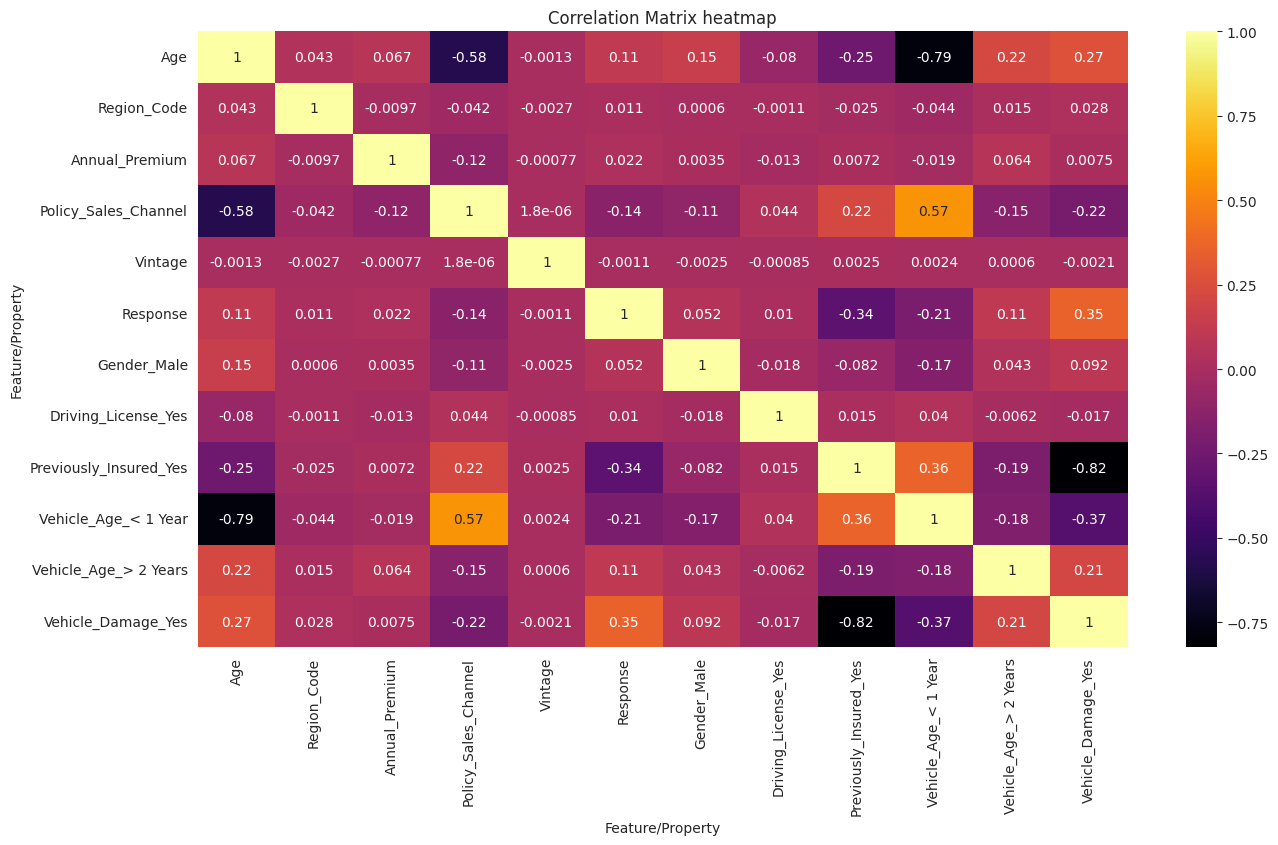

In [67]:
corr_matrix = df.corr()
plt.figure(figsize=(15,8))
# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='inferno')

#setting labels to infer the plot
plt.title('Correlation Matrix heatmap')
plt.ylabel('Feature/Property')
plt.xlabel('Feature/Property')

In [68]:
# dropping the Driving Licence Yes column.
df.drop(columns=['Driving_License_Yes'],axis=1,inplace=True)

In [69]:
#Defining X(independent variables) and y(response) variable

X=df.drop(['Response'],axis=1)
y=df['Response']
print('Before OverSampling')
print("counts of label '1': {}".format(sum(y == 1))) 
print("counts of label '0': {}".format(sum(y == 0))) 

Before OverSampling
counts of label '1': 46710
counts of label '0': 334399


In [70]:
# Handling Imbalanced Dataset (If needed)
# Using SMOTE method

sm=SMOTE()
x_balanced, y_balanced = sm.fit_resample(X, y.ravel())

print("After OverSampling, counts of label '1': {}".format(sum(y_balanced == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_balanced == 0))) 

After OverSampling, counts of label '1': 334399
After OverSampling, counts of label '0': 334399


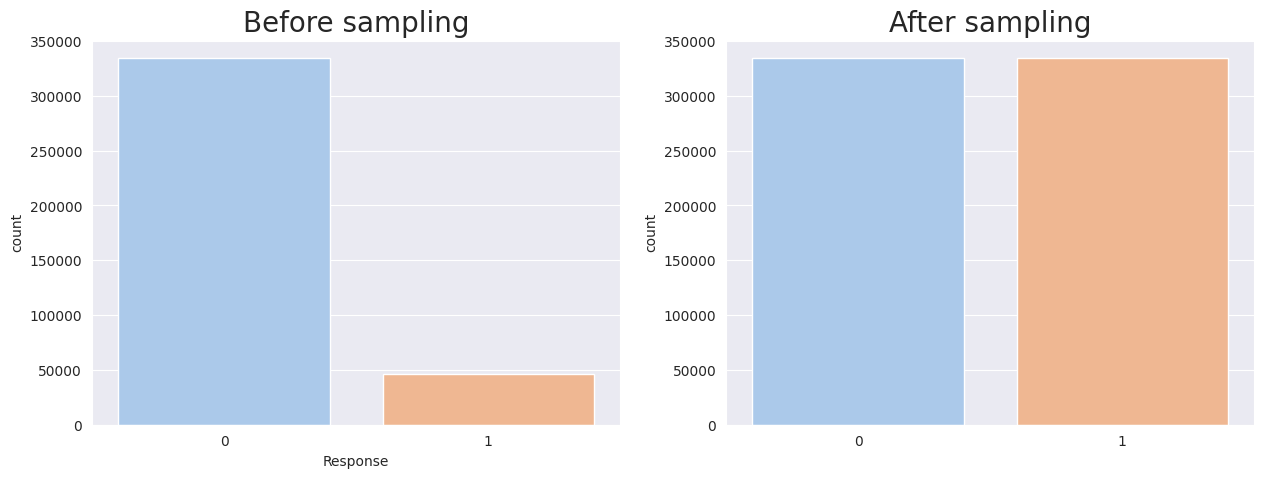

In [71]:
# Visualizing the balanced dataset

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot(x=df['Response'], data=df, palette='pastel')
plt.title('Before sampling',fontsize=20)
plt.subplot(1,2,2)
sns.countplot(x=y_balanced,palette='pastel')
plt.title('After sampling',fontsize=20)
plt.show()

In [72]:
# Train test split our data

X_train,X_test,y_train,y_test = train_test_split(x_balanced,y_balanced, test_size=0.2,random_state=21)

In [74]:
# Normalizing the Dataset using Standard Scaling Technique.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(535038, 10) (535038,)
(133760, 10) (133760,)


## ML Model Implementation

In [78]:
def get_stat(model, X_train, X_test, y_train, y_test, output_name):
  '''this function implements the given model calculates the stastics and add the results to train and test dictionaries
  '''
  # fit the model
  model.fit(X_train,y_train)

  # predicting the test model
  y_pred = model.predict(X_test)

  # predict probability
  y_pred_probability = model.predict_proba(X_test)[:,1]
  print('--'*30)
  print(f'scores for {output_name}')
  print('--'*30)
  
  # calculating the recall score on y test and y predict
  recall_score_rs= recall_score(y_test, y_pred)
  print("Recall_Score : ", recall_score_rs)

  # calculating the Precision Score
  precision_score_ps= precision_score(y_test, y_pred)
  print("Precision_Score :",precision_score_ps)

  # calculating the f1 Score
  f1_score_fs= f1_score(y_test, y_pred)
  print("f1_Score :", f1_score_fs)

  # calculating the accuracy Score
  accuracy_score_as= accuracy_score(y_test , y_pred)
  print("Accuracy_Score :",accuracy_score_as)

  # Calculating the ROC auc Score
  roc_auc_score_ras = roc_auc_score(y_test , y_pred)
  print("ROC_AUC Score:",roc_auc_score_ras)

  # getting confusion matrix
  confusion_matrix_logic = metrics.confusion_matrix(y_test, y_pred)
  print('--'*30)
  print(f'confusion matrix for the implemented {output_name}')
  print('--'*30)
  print(confusion_matrix_logic)
  print('\n')

  # Plotting the confusion matrix
  fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix_logic, figsize=(6, 6), cmap=plt.cm.Blues)
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title(f'Confusion Matrix for {output_name}', fontsize=18)
  plt.show()

  print('--'*30)
  print(f'{output_name} ROC curve')
  print('--'*30)

  # Plotting ROC (Receiver Operating Characteristic) curve
  plt.rcParams['figure.figsize'] = (6,6)
  fpr, tpr, _ = roc_curve(y_test, y_pred_probability)
  plt.title(f'{output_name} ROC curve')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.plot(fpr,tpr)
  plt.plot((0,1), linestyle="--",color='black')
  plt.show()

def evaluation(model, X_train, X_test, y_train, y_test, output_name):
  # Evaluation
  # Fit the Algorithm
  model.fit(X_train, y_train)

  # Predict on the model
  y_pred = model.predict(X_test)

  print('--'*30)
  # calculating Recall score
  recall_score_rs= recall_score(y_test, y_pred)
  print("Recall_Score : ", recall_score_rs)

  # Calculating Precision Score
  precision_score_ps= precision_score(y_test, y_pred)
  print("Precision_Score :",precision_score_ps)

  # calculating f1 Score
  f1_score_fs = f1_score(y_test, y_pred)
  print("f1_Score :", f1_score_fs)

  # calculating accuracy Score
  accuracy_score_as = accuracy_score(y_test , y_pred)
  print("Accuracy_Score :",accuracy_score_as)

  # calculating ROC auccracy score
  roc_auc_score_ras = roc_auc_score(y_test , y_pred)
  print("ROC_AUC Score:",roc_auc_score_ras)

------------------------------------------------------------
scores for Logistic Regression
------------------------------------------------------------
Recall_Score :  0.8934460571599581
Precision_Score : 0.7652645339895416
f1_Score : 0.8244025018294282
Accuracy_Score : 0.8098385167464115
ROC_AUC Score: 0.8099009756888988
------------------------------------------------------------
confusion matrix for the implemented Logistic Regression
------------------------------------------------------------
[[48615 18315]
 [ 7121 59709]]




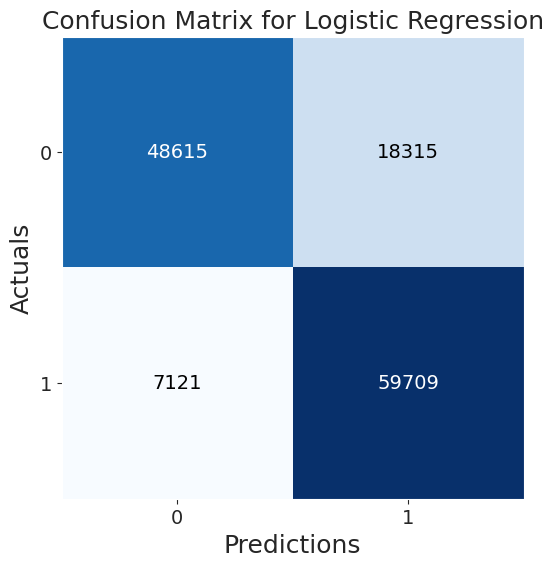

------------------------------------------------------------
Logistic Regression ROC curve
------------------------------------------------------------


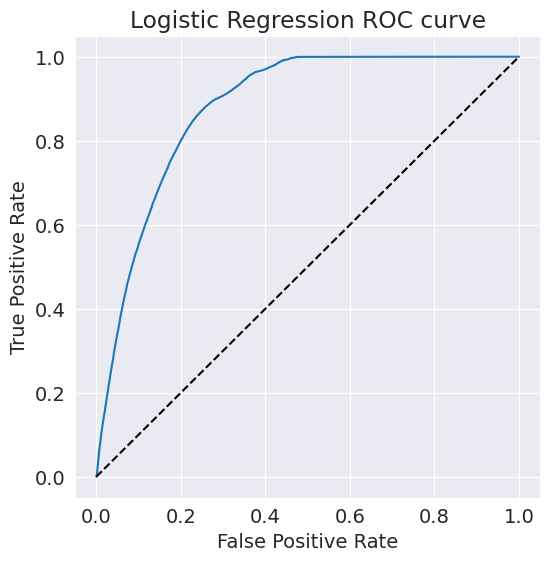

In [79]:
# initiating the logistic regression
LoReg = LogisticRegression()

# Fit the Algorithm and Predict on the model
get_stat(LoReg, X_train, X_test, y_train, y_test, 'Logistic Regression')

## Cross- Validation & Hyperparameter Tuning

In [80]:
#setting grid parameters
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Fit the Algorithm and Predict on the model
grid_LoReg = GridSearchCV(LoReg, param_grid, cv=5)

# getting scores after gridsearchCV
evaluation(grid_LoReg, X_train, X_test, y_train, y_test, 'Logistic Regression after tuning')
print('--'*30)
print("Best cross-validation score:", grid_LoReg.best_score_)
print("Best parameters:", grid_LoReg.best_params_)

------------------------------------------------------------
Recall_Score :  0.8934460571599581
Precision_Score : 0.7652645339895416
f1_Score : 0.8244025018294282
Accuracy_Score : 0.8098385167464115
ROC_AUC Score: 0.8099009756888988
------------------------------------------------------------
Best cross-validation score: 0.8111050044410858
Best parameters: {'C': 1}


## Random Forest Classifier

------------------------------------------------------------
scores for Random Forest
------------------------------------------------------------
Recall_Score :  0.9090228939099207
Precision_Score : 0.8668045944210602
f1_Score : 0.8874118978928532
Accuracy_Score : 0.8847562799043063
ROC_AUC Score: 0.8847744082578142
------------------------------------------------------------
confusion matrix for the implemented Random Forest
------------------------------------------------------------
[[57595  9335]
 [ 6080 60750]]




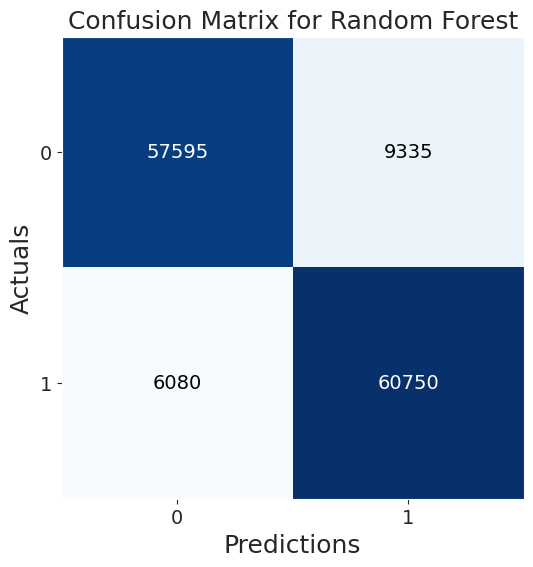

------------------------------------------------------------
Random Forest ROC curve
------------------------------------------------------------


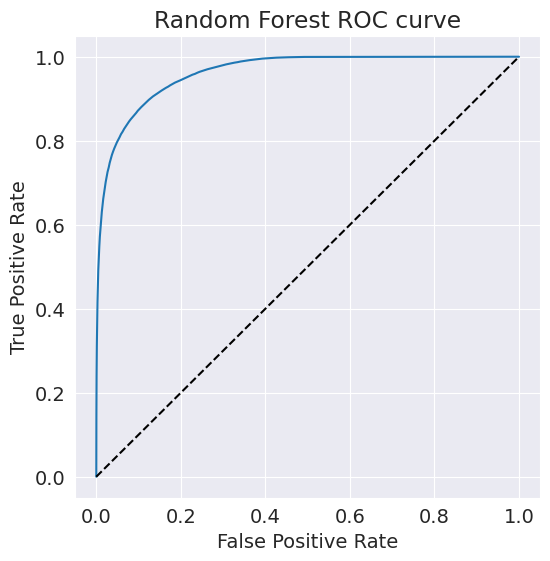

In [81]:
# initializing rfc
rfc = RandomForestClassifier()
# geting stastics
get_stat(rfc, X_train, X_test, y_train, y_test, 'Random Forest')

In [83]:
 #ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
rfc_tuned = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Fit the Algorithm and Predict on the model
evaluation(rfc_tuned, X_train, X_test, y_train, y_test, 'random forest after tuning')

------------------------------------------------------------
Recall_Score :  0.9114619183001645
Precision_Score : 0.7792475277923474
f1_Score : 0.8401851047248603
Accuracy_Score : 0.8267568779904306
ROC_AUC Score: 0.8268201568192889


## XGB Classifier

------------------------------------------------------------
scores for XGB Classifier
------------------------------------------------------------
Recall_Score :  0.8953464013167739
Precision_Score : 0.8861704333402447
f1_Score : 0.8907347862331786
Accuracy_Score : 0.8902511961722488
ROC_AUC Score: 0.8902550025409508
------------------------------------------------------------
confusion matrix for the implemented XGB Classifier
------------------------------------------------------------
[[59244  7686]
 [ 6994 59836]]




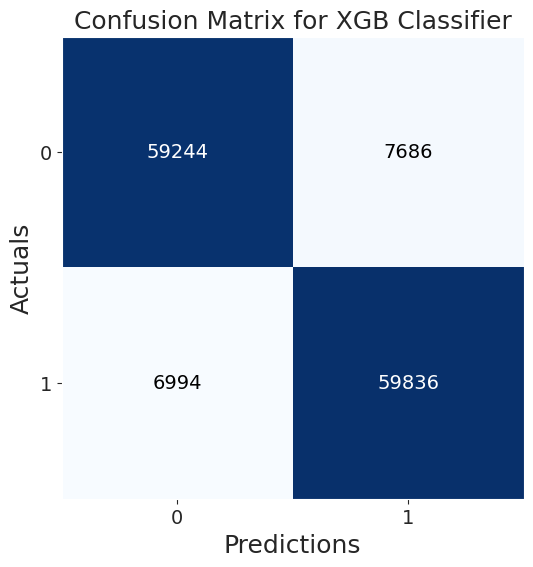

------------------------------------------------------------
XGB Classifier ROC curve
------------------------------------------------------------


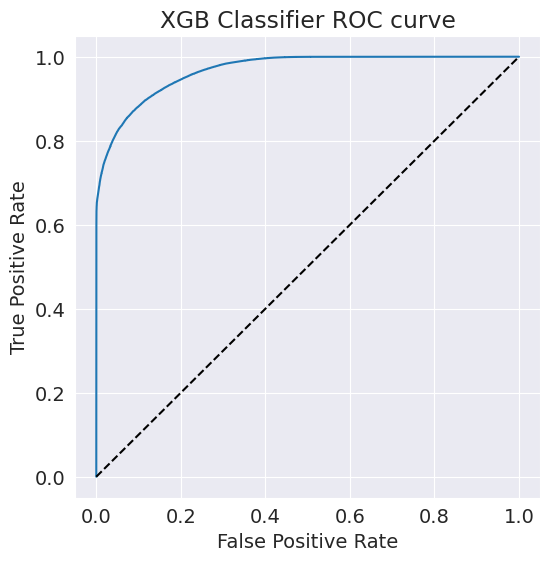

In [84]:
xgb = XGBClassifier()


# Fit the Algorithm and Predict
get_stat(xgb, X_train, X_test, y_train, y_test, 'XGB Classifier')

In [85]:
params = {
    'max_depth': [3, 5],
    'learning_rate': [0.1],
    'n_estimators': [10, 20],
}

# Perform cross-validation and hyperparameter tuning
grid_search = GridSearchCV(xgb, params, cv=5, scoring='accuracy')
# Fit the Algorithm and Predict on the model
evaluation(grid_search, X_train, X_test, y_train, y_test, 'XGB Classifier after tuning')

------------------------------------------------------------
Recall_Score :  0.9399521173125842
Precision_Score : 0.766799721683085
f1_Score : 0.8445926413940076
Accuracy_Score : 0.827175538277512
ROC_AUC Score: 0.827259787925678


In [86]:
features = x_balanced.columns
importances = rfc_tuned.feature_importances_
indices = np.argsort(importances)

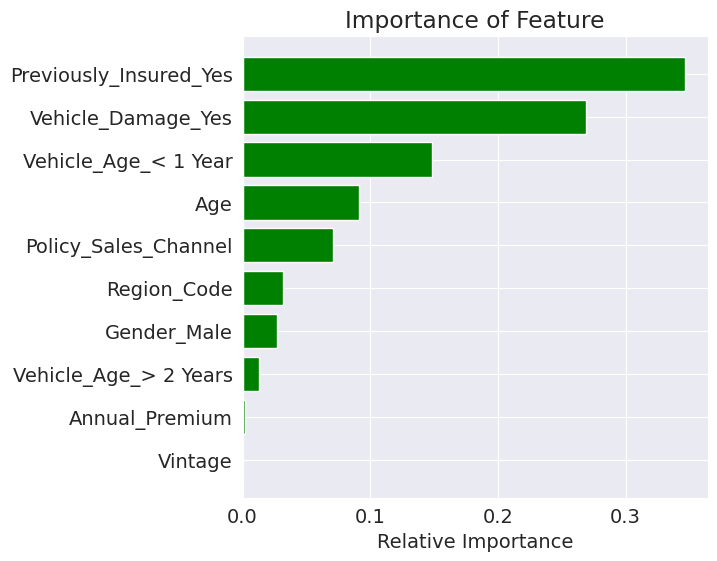

In [89]:
#Plotting figure
plt.figure(figsize=(6,6))
plt.title('Importance of Feature')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

* As we can see from the feature importance graph, the feature 'Previously_Insured_yes' can be considered as most important with relative importance of 0.38.

* The next 4 features are vintage, annual_premium, age and vehicle_damage-yes can be considered with relative importance 0.26, 0.125, 0.095, 0.075 respectivly

* As these 5 main features play a role in decreasing the value of entropy, the machine learning model, random forest classifier considers them closer to the root node.

# Conclusion

Solution after ML implementation

the insurance company can deploy a machine learning model(Tuned with best parameters) that uses Random Forest Classifier to predict the wheather the already existing health insurance customer would be interested in a vehicle insurance product. The company can improve the conversion rate by taking steps to encourage people to buy vehicle insurance by offering some incentives/ease of application & claim settlement process.

Observations by EDA

* There are 206089 Male customers and 175020 Female customers
* there are 380297 people who own Driving License and 812 don't
* Its found that most of the people who own driving license owns a car
* It is observed that people who have previously not insured are intrested in the policy
* It is found that people who have not insured previously are more intrested in buying the ploicy, so it is better to tap the market who previously have not insured
*It is observed that most of the people with vehicle age is 1-2 years. ratio wise people with vehicle age greater than 2 years are more intrested in buying policy
*most of the customers have their vehicle age as 1-2 years
*as per the ratio it is better to tap the customers whose vehicle age is more than 2 years and we have a good scope in people who own vehicle of age 1-2 years as well.
*Its found that previously customers who got their vehicle damaged are more intrested in buying new policy
*customers who are previously not damaged their car are not much intrested in buying the policy
*people who have damaged their car previously are more intrested in buying the policy.
*It is found that people who have damaged their vehicle and not damaged share almost equal proportion.
*comparing the insights previously it is found that the people who damaged their vehicle are more intrested to buy ploicy, so since 50% of the people who are willing to buy the plociy, the market is big to capture
*Most of the premium falls under range 5000-100000
*there are some premiums that are above 100000
*There are no outliers in the age columns and most of the customers belong to age group 25-48
*Customes of age between 32-58 ar more mature and are intrested in buying the policy
*Tapping the customer of age between 32-58 would be more benificial
*Most of the customers belong to region code 28 followed by 8
*most of our customers belong to region code 28, so it would be better if we run our marketing campagn such that in 28 to aquire more customers and in other regions to penetrate the market
*Its found that most of the customer have vehicle age of around 1-2 year and there are less customers whose vehicle age is greater than 2 years
*Its found that most of the customers who do not own driving license are less and are least intreasted, so tapping the customers with license would be benificial
*
It is found that policy sales channel and respons is negativly correlated.
*most of the properties/features against eachother are very least correlated.
*positive response of Vintage customers are positivly correlated with annual customers
*policy sales channel is negativly corellated to age